In [4]:
from sklearn import datasets
import numpy.linalg as lin
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras import models
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# MNIST 기초

- inverse를 통한 mnist 학습
- 신경망을 통한 mnist 학습
- cnn통한 mnist 학습 
- fashon mnist, fast db 학습
- web 연동(한글, 스케치 인식)


In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)
(10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254
  109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252
   82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   

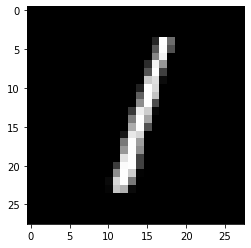

In [6]:
print(X_train.shape)
plt.imshow(X_train[2], cmap='gray')
print(X_test.shape)
plt.imshow(X_test[2], cmap='gray')
print(X_test[2])
print(y_train.shape)
print(y_train)

In [8]:
X_train = X_train.reshape((X_train.shape[0], 784))
X_test = X_test.reshape((X_test.shape[0], 784))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


원핫 인코딩

In [11]:
y_train_e = to_categorical(y_train)
y_test_e = to_categorical(y_test)

## 1. 역행렬을 이용한 학습

y = wx + b  

1 = w2.3 + b*1  -> 2.3  1  [w   = [1  
6 = w1.5 + b*1  -> 1.5  1   b]     6]  

역행렬만 구해주면 됨.  

- y = W x .[x 1].
- A 60000 X 785(=784 + 1)  
- W = int(A) * y  , where Y = 60000*10, W= 785X 10
                                              2x 1
- predict ([x 1] * W), where x = 1x784 w=785x10  , 1x10



In [12]:
A = np.hstack(((X_train, np.ones((60000, 1))) ))

In [14]:
A.shape

(60000, 785)

In [15]:
%%time
W = np.matmul(lin.pinv(A), y_train_e)
print(W.shape)
print(W)

(785, 10)
[[ 7.44778176e-17  3.08116485e-17  6.24517735e-17 ... -1.88247215e-17
  -9.68761667e-17  2.74183832e-17]
 [ 6.37351236e-16 -2.76720495e-15 -2.38747509e-15 ...  1.19908305e-15
   1.98622008e-15  1.90420431e-15]
 [ 5.70720542e-15  1.07908655e-14  1.08314732e-14 ... -1.04222601e-14
  -1.36075550e-14 -4.14879462e-15]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.57799659e-01  2.41326501e-01  4.98284745e-02 ...  1.41540555e-01
  -1.23002061e-01  4.55121243e-02]]
Wall time: 11.4 s


In [17]:
print(W[:,0])

[ 7.44778176e-17  6.37351236e-16  5.70720542e-15 -6.89410182e-15
  1.61921169e-15  6.01081563e-15  1.06678417e-15 -2.35600322e-15
 -1.58289428e-15  5.28664505e-15  1.76241660e-15  3.89576048e-15
  3.02162834e-04  3.88864085e-04 -3.03538959e-04 -1.26474566e-05
 -5.69734437e-15  5.74454725e-15  8.25712682e-16  3.17557575e-15
 -9.67780512e-16  6.02280294e-15 -1.59623568e-15  3.28759776e-15
 -2.20570217e-15 -1.75501660e-15  3.72004608e-15 -2.80269838e-15
 -9.00127165e-16 -3.07402116e-15  5.85091557e-16  7.15061724e-15
 -7.99728688e-03  2.07102122e-03  2.37473673e-04  4.17736615e-04
  1.25130340e-04  5.21710603e-06  1.07704793e-04  2.28418868e-04
 -1.42711146e-04  5.35057295e-04 -3.19725195e-04  1.21111359e-04
  3.70121319e-07  1.51179376e-04 -1.21512767e-04  3.00575592e-05
  1.67712928e-04 -2.78002180e-04  4.66517424e-04  7.11096870e-05
  1.78253451e-15 -5.74546886e-15  3.12809877e-15  1.83356068e-15
 -2.18639760e-15  3.36444272e-15 -1.63857575e-02  1.91555200e-02
  1.04795930e-03 -1.56986

In [25]:
T = np.hstack((X_test, np.ones((10000, 1)) ))
p = np.matmul(T, W)
print(p.shape)

(10000, 10)


샘플 하나에 10개의 클래스가 나옴.

argmax를 통해 최대값을 가져옴

In [26]:
p = np.argmax(p, axis = 1)
print(p.shape)
print(p)

(10000,)
[7 2 1 ... 4 5 6]


In [23]:
a = np.array([[1,2,3], 
              [7,8,9], 
              [4,5,6]])
print(np.argmax(a))
print(np.argmax(a, axis=1)) #각각의 행에서 최대값의 index를 출력
print(np.argmax(a, axis=0)) #각각의 컬럼에서 최대값의 index를 출력

5
[2 2 2]
[1 1 1]


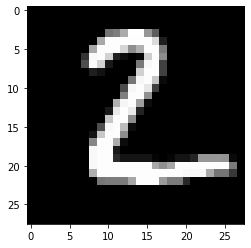

In [29]:
plt.imshow(X_test[1, :].reshape(28,28), cmap="gray")

In [31]:
# 인식률 조사
np.mean(p == y_test) # 1 0 1 0 -> 50%, so 평균하면 됨

0.8603

바이어스에 대한 이야기  

바이어스를 뺴면 원점을 지나는 직선을 구하게 된다.  

데이터들이 원점 근처에 있으면 크게 차이 안날 수도 있지만  

일반적이지 않다. 

## 이것을 히든 레이어가 없는 신경망으로 풀어보자

퍼셉트론

In [36]:
model = Sequential()
model.add(Dense(10, activation='softmax')) # 출력층 10개, 활성함수 softmax -> 확률값으로 해석하기 위해
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 0.1 0.9 1.2    
# -> 
# 0.1/(0.1+0.9+1.2) #정규화
# exp(0.1) / (exp(0.1) + exp(0.9) + exp(1.2))  지수로그 + 정규화 -> 소프트맥스
# 작은것은 더 작게하고 큰것은 더 크게하자라는 발상

In [37]:
hist = model.fit(x = X_train, y = y_train_e, # 원핫 인코팅된 y
                epochs = 10, 
                verbose = 1, # 로그를 축약
                batch_size=32) # 32개씩 랜덤하게 뽑음



Epoch 1/10
60000/60000 [==============================] - 3s 55us/step - loss: 9.6325 - accuracy: 0.8383
Epoch 2/10
60000/60000 [==============================] - 4s 60us/step - loss: 6.0792 - accuracy: 0.8797
Epoch 3/10
60000/60000 [==============================] - 4s 58us/step - loss: 5.6632 - accuracy: 0.8844
Epoch 4/10
60000/60000 [==============================] - 3s 50us/step - loss: 5.5253 - accuracy: 0.8843
Epoch 5/10
60000/60000 [==============================] - 3s 56us/step - loss: 5.3065 - accuracy: 0.8870
Epoch 6/10
60000/60000 [==============================] - 4s 60us/step - loss: 5.1862 - accuracy: 0.8863
Epoch 7/10
60000/60000 [==============================] - 3s 57us/step - loss: 5.3000 - accuracy: 0.8878
Epoch 8/10
60000/60000 [==============================] - 3s 54us/step - loss: 5.2889 - accuracy: 0.8885
Epoch 9/10
60000/60000 [==============================] - 4s 66us/step - loss: 5.2992 - accuracy: 0.8891
Epoch 10/10
60000/60000 [=============================

In [38]:
# 인식률 계산
score = model.evaluate(X_test, y_test_e, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 6.490964854875902
Test accuracy: 0.8851000070571899


In [42]:
# 예측
p = model.predict(X_test)
print(p.shape)
p = np.argmax(p, axis=1)
print(np.mean(p == y_test))

(10000, 10)
0.8851


In [40]:
print(p[0])

[0.0000000e+00 0.0000000e+00 0.0000000e+00 2.4618973e-30 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
